# Brazilian E-Commerce Public Dataset by Olist

## Main Information
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. The dataset has information of 100k orders made at multiple marketplaces in Brazil. Its features allow viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. A geolocation dataset that relates Brazilian zip codes to lat/lng coordinates is also integrated in the dataset.

Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. 
After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

**Goals**

Use data analytics tools to answer following questions:
- How many customers, orders, and orders per customer does the company have?
- What is the number of customers by state?
- What is the number of orders by month, day?
- What are the top 5 city?
- Visualise the company’s customers’ demographics, sales trend, orders by categories, orders changes by year, etc. and use visualisation tools to help make better decisions

In [1]:
#!pip install jupyter-summarytools

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display

#Dates
import itertools
from dateutil.relativedelta import relativedelta
import datetime as dt

#fast summary visualisation 
from summarytools import dfSummary

# Stats
import math
import sidetable as stb
import scipy.stats as stats
from matplotlib import pyplot as plt

# from collections import Counter

#visualisation 
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.io

import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [3]:
def data_info(data):
    print('-'*65)
    print('\033[1m INFO: \033[0m ')
    print(' ')
    display( data.info(memory_usage='deep'))
    print('-'*65)
    print('\033[1m HEAD: \033[0m ')
    display( data.head(5))
    print('-'*65)
    print('\033[1m DESCRIBE: \033[0m ')
    display( data.describe().T)
    print('-'*65)
    print('\033[1m MISSING VALUES: \033[0m ')
    print(' ')
    display( data.isna().sum())
    print('-'*65)
    print('\033[1m DUPLICATED: \033[0m')
    print('We have {} duplicated rows!'.format(data.duplicated().sum()))

#for convenience, display a table of all columns and convert the data to the format of three decimal places
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', 1)
pd.options.display.float_format = '{:,.3f}'.format
#ssetting seaborn visualization
sns.set_palette('Dark2')
sns.set_style('darkgrid')

In [4]:
def show_plot(data, column, pl_type):
    fig, ax = plt.subplots(figsize=(13,8))
    sns.set_palette('viridis')
    plt.title('Distribution '+column, fontdict={'size':15})
    if pl_type == 'plot':
        sns.countplot(x=column, data=data)
    else:
        sns.kdeplot(data[column], shade=True, palette='viridis')
    plt.xlabel(column)
    plt.show()

## Load the datasets
We have to load the databases, analyze the data for incorrect and missing values. After we prepare our database for work, we need to turn to the main tasks that we want to study.

In [5]:
#creating variable for dataset path
data_path = '/Users/lanadashevsky/M_AD_Home_Task/datasets/'

In [6]:
try:
    df_customers = pd.read_csv('olist_customers_dataset.csv')
    df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
    df_orders = pd.read_csv('olist_orders_dataset.csv')
    df_order_items = pd.read_csv('olist_order_items_dataset.csv')
    df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
    df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
    df_products = pd.read_csv('olist_products_dataset.csv')
    df_sellers = pd.read_csv('olist_sellers_dataset.csv')
    
except:
    df_customers = pd.read_csv(data_path + 'olist_customers_dataset.csv')
    df_geolocation = pd.read_csv(data_path + 'olist_geolocation_dataset.csv')
    df_orders = pd.read_csv(data_path + 'olist_orders_dataset.csv')
    df_order_items = pd.read_csv(data_path + 'olist_order_items_dataset.csv')
    df_order_payments = pd.read_csv(data_path + 'olist_order_payments_dataset.csv')
    df_order_reviews = pd.read_csv(data_path + 'olist_order_reviews_dataset.csv')
    df_products = pd.read_csv(data_path + 'olist_products_dataset.csv')
    df_sellers = pd.read_csv(data_path + 'olist_sellers_dataset.csv')

### Dataset `Customers`

**Description of the data:**

The dataset contains the basic information about the customer.

The file `olist_customers_dataset.csv` contains the following columns:

- `customer_id` — customer identifier
- `customer_unique_id` — customer unique identifier
- `customer_zip_code_prefix` — customer zip code
- `customer_city` - city
- `customer_state` — state

In [7]:
data_info(df_customers)

-----------------------------------------------------------------
 INFO:  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 29.6 MB


None

-----------------------------------------------------------------
 HEAD:  


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


-----------------------------------------------------------------
 DESCRIBE:  


,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,"99,441.000","35,137.475","29,797.939","1,003.000","11,347.000","24,416.000","58,900.000","99,990.000"


-----------------------------------------------------------------
 MISSING VALUES:  
 


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

-----------------------------------------------------------------
 DUPLICATED: 
We have 0 duplicated rows!


**Conclusions**

This dataset has 99441 rows and 5 columns total. All data presented in 1 numeric column and 4 object type.

We don't have duplicate rows and missing values.

### Dataset `Geolocation`

**Description of the data:**

The dataset contains the information about the geolocation of the customer.

The file `olist_geolocation_dataset.csv` contains the following columns:

- `geolocation_zip_code_prefix` — zip code
- `geolocation_lat` — latitude 
- `geolocation_lng` — longitude
- `geolocation_city` - city
- `geolocation_state` — state

In [8]:
data_info(df_geolocation)

-----------------------------------------------------------------
 INFO:  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 145.2 MB


None

-----------------------------------------------------------------
 HEAD:  


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.546,-46.639,sao paulo,SP
1,1046,-23.546,-46.645,sao paulo,SP
2,1046,-23.546,-46.643,sao paulo,SP
3,1041,-23.544,-46.639,sao paulo,SP
4,1035,-23.542,-46.642,sao paulo,SP


-----------------------------------------------------------------
 DESCRIBE:  


,count,mean,std,min,25%,50%,75%,max
geolocation_zip_code_prefix,"1,000,163.000","36,574.166","30,549.336","1,001.000","11,075.000","26,530.000","63,504.000","99,990.000"
geolocation_lat,"1,000,163.000",-21.176,5.716,-36.605,-23.604,-22.919,-19.980,45.066
geolocation_lng,"1,000,163.000",-46.391,4.270,-101.467,-48.573,-46.638,-43.768,121.105


-----------------------------------------------------------------
 MISSING VALUES:  
 


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

-----------------------------------------------------------------
 DUPLICATED: 
We have 261831 duplicated rows!


**Conclusions**

This dataset has 1000163 rows and 5 columns total. All data presented in 3 numeric column and 2 object type. 

We don't have missing values.
We have 261831 duplicate rows.  

We can combine customers dataset with the following geolocation dataset to find the distribution of customers in Brazil by city, state, and so on.

### Dataset `Orders`

**Description of the data:**

The dataset contains the information about the orders.

The file `olist_orders_dataset.csv` contains the following columns:

- `order_id` — order identifier code
- `customer_id` — customer identifier 
- `order_status` — status of the order
- `order_purchase_timestamp` - the purchase timestamp
- `order_approved_at` — the payment approval timestamp
- `order_delivered_carrier_date` - the order posting timestamp, when it was handled to the logistic partner
- `order_delivered_customer_date` - the actual order delivery date to the customer.
- `order_estimated_delivery_date` - the estimated delivery date that was informed to customer at the purchase moment.

In [9]:
data_info(df_orders)

-----------------------------------------------------------------
 INFO:  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 59.0 MB


None

-----------------------------------------------------------------
 HEAD:  


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


-----------------------------------------------------------------
 DESCRIBE:  


,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


-----------------------------------------------------------------
 MISSING VALUES:  
 


order_id                         0   
customer_id                      0   
order_status                     0   
order_purchase_timestamp         0   
order_approved_at                160 
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date    0   
dtype: int64

-----------------------------------------------------------------
 DUPLICATED: 
We have 0 duplicated rows!


**Conclusions**

This dataset has 99441 rows and 8 columns total. All data presented in object type. 

We have missing values in columns - `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`.

We have 0 duplicate rows.

The number of missing values 2965 in the column `order_delivered_customer_date` is about 3% of the total dataset (in the another two columns less). It is necessary to study the missing values and decide how to replace them.

We can see that all the represented time date is in object format and should be formatted as datetime.
Let's create new columns with date without time for further work and grouping by days.


### Dataset `Order Items`

**Description of the data:**

The dataset contains the information about the order items.

The file `olist_order_items_dataset.csv` contains the following columns:

- `order_id` — order identifier code
- `order_item_id` — the number of the product in the order 
- `product_id` — product identifier code
- `seller_id` - seller identifier code
- `shipping_limit_date` — the delivery date that was informed to customer at the purchase moment
- `price` - amount paid for the order
- `freight_value` -  carrier's delivery charge

In [10]:
data_info(df_order_items)

-----------------------------------------------------------------
 INFO:  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 39.4 MB


None

-----------------------------------------------------------------
 HEAD:  


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900,13.290
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.900,19.930
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.000,17.870
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.990,12.790
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.900,18.140


-----------------------------------------------------------------
 DESCRIBE:  


,count,mean,std,min,25%,50%,75%,max
order_item_id,"112,650.000",1.198,0.705,1.000,1.000,1.000,1.000,21.000
price,"112,650.000",120.654,183.634,0.850,39.900,74.990,134.900,"6,735.000"
freight_value,"112,650.000",19.990,15.806,0.000,13.080,16.260,21.150,409.680


-----------------------------------------------------------------
 MISSING VALUES:  
 


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

-----------------------------------------------------------------
 DUPLICATED: 
We have 0 duplicated rows!


**Conclusions**

This dataset has 112650 rows and 7 columns total. All data presented in 3 numeric column and 4 object type. 

We don't have missing values and  duplicate rows.

We can see that the represented time date is in object format and should be formatted as datetime.
Let's create new columns with date without time for further work and grouping by days.

### Dataset `Order Payments`

**Description of the data:**

The dataset contains the information about the order payments.

The file `olist_order_payments_dataset.csv` contains the following columns:

- `order_id` — order identifier code
- `payment_sequential` — a customer may pay an order with more than one payment method 
- `payment_type` — method of payment chosen by the customer
- `payment_installments` - number of installments chosen by the customer
- `payment_value` — transaction value

In [11]:
data_info(df_order_payments)

-----------------------------------------------------------------
 INFO:  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 17.8 MB


None

-----------------------------------------------------------------
 HEAD:  


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.330
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.390
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.710
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.780
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.450


-----------------------------------------------------------------
 DESCRIBE:  


,count,mean,std,min,25%,50%,75%,max
payment_sequential,"103,886.000",1.093,0.707,1.000,1.000,1.000,1.000,29.000
payment_installments,"103,886.000",2.853,2.687,0.000,1.000,1.000,4.000,24.000
payment_value,"103,886.000",154.100,217.494,0.000,56.790,100.000,171.838,"13,664.080"


-----------------------------------------------------------------
 MISSING VALUES:  
 


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

-----------------------------------------------------------------
 DUPLICATED: 
We have 0 duplicated rows!


**Conclusions**

This dataset has 103886 rows and 5 columns total. All data presented in 3 numeric column and 2 object type. 

We don't have missing values and duplicate rows.  

### Dataset `Order Reviews`

**Description of the data:**

The dataset contains the information about the order payments.

The file `olist_order_reviews_dataset.csv` contains the following columns:

- `review_id` - review identifier code
- `order_id` — order identifier code
- `review_score` — customer satisfaction, review score from 1 to 5 
- `review_comment_title` — the review title
- `review_comment_message` - review message text
- `review_creation_date` - the date the review was posted 
- `review_answer_timestamp` — the date the answer from seller was posted

In [12]:
data_info(df_order_reviews)

-----------------------------------------------------------------
 INFO:  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 42.7 MB


None

-----------------------------------------------------------------
 HEAD:  


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


-----------------------------------------------------------------
 DESCRIBE:  


,count,mean,std,min,25%,50%,75%,max
review_score,"99,224.000",4.086,1.348,1.000,4.000,5.000,5.000,5.000


-----------------------------------------------------------------
 MISSING VALUES:  
 


review_id                  0    
order_id                   0    
review_score               0    
review_comment_title       87656
review_comment_message     58247
review_creation_date       0    
review_answer_timestamp    0    
dtype: int64

-----------------------------------------------------------------
 DUPLICATED: 
We have 0 duplicated rows!


**Conclusions**

This dataset has 99224 rows and 7 columns total. All data presented in 1 numeric column and 6 object type. 

Time columns are in object format and need to be converted to datetime format.

We don't have duplicate rows, but we have a lot of missing values in columns with `review_comment_title` and `review_comment_message`.
It should be noted that we do not have missing values in the review score column and this will help us determine which products have the best reviews.

### Dataset `Products`

**Description of the data:**

The dataset contains the information about the products.

The file `olist_products_dataset.csv` contains the following columns:

- `product_id` - product identifier code
- `product_category_name` — name of category
- `product_name_lenght` — product name lenght 
- `product_description_lenght` - product description lenght
- `product_photos_qty` — numbers of the product photo
- `product_weight_g` - weight of product, in gramm
- `product_length_cm` - length of product, in cm
- `product_height_cm` — height of product, in cm
- `product_width_cm` - width of product, in cm

In [13]:
data_info(df_products)

-----------------------------------------------------------------
 INFO:  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 6.8 MB


None

-----------------------------------------------------------------
 HEAD:  


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.000,287.000,1.000,225.000,16.000,10.000,14.000
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.000,276.000,1.000,"1,000.000",30.000,18.000,20.000
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.000,250.000,1.000,154.000,18.000,9.000,15.000
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.000,261.000,1.000,371.000,26.000,4.000,26.000
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.000,402.000,4.000,625.000,20.000,17.000,13.000


-----------------------------------------------------------------
 DESCRIBE:  


,count,mean,std,min,25%,50%,75%,max
product_name_lenght,"32,341.000",48.477,10.246,5.000,42.000,51.000,57.000,76.000
product_description_lenght,"32,341.000",771.495,635.115,4.000,339.000,595.000,972.000,"3,992.000"
product_photos_qty,"32,341.000",2.189,1.737,1.000,1.000,1.000,3.000,20.000
product_weight_g,"32,949.000","2,276.472","4,282.039",0.000,300.000,700.000,"1,900.000","40,425.000"
product_length_cm,"32,949.000",30.815,16.914,7.000,18.000,25.000,38.000,105.000
product_height_cm,"32,949.000",16.938,13.638,2.000,8.000,13.000,21.000,105.000
product_width_cm,"32,949.000",23.197,12.079,6.000,15.000,20.000,30.000,118.000


-----------------------------------------------------------------
 MISSING VALUES:  
 


product_id                    0  
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g              2  
product_length_cm             2  
product_height_cm             2  
product_width_cm              2  
dtype: int64

-----------------------------------------------------------------
 DUPLICATED: 
We have 0 duplicated rows!


**Conclusions**

This dataset has 32949 rows and 9 columns total. All data presented in 7 numeric column and 2 object type. 

We don't have duplicate rows, but we have some missing values (610) in columns with `product_category_name`, `product_name_lenght`, `product_description_lenght` and `product_photos_qty`.
It is worth noting that for all 4 columns the same number of missing values. It is possible that these are the same rows, it is needs to be checked.

### Dataset `Sellers`

The dataset contains the information about the sellers.

The file `olist_sellers_dataset.csv` contains the following columns:

- `seller_id` - seller identifier code
- `seller_zip_code_prefix` - seller zip code
- `seller_city` - seller city
- `seller_state` - seller state

In [14]:
data_info(df_sellers)

-----------------------------------------------------------------
 INFO:  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 674.7 KB


None

-----------------------------------------------------------------
 HEAD:  


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


-----------------------------------------------------------------
 DESCRIBE:  


,count,mean,std,min,25%,50%,75%,max
seller_zip_code_prefix,"3,095.000","32,291.059","32,713.454","1,001.000","7,093.500","14,940.000","64,552.500","99,730.000"


-----------------------------------------------------------------
 MISSING VALUES:  
 


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

-----------------------------------------------------------------
 DUPLICATED: 
We have 0 duplicated rows!


**Conclusions**

This dataset has 3095 rows and 4 columns total. All data presented in 1 numeric column and 3 object type.

We don't have duplicate rows and missing values.

## Study data and preprocessing
 

In this section, we will change all the data of the time columns to the correct type datetime, as well as replace the missing values depending on the column with new values.

### `Orders`

In [15]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [16]:
df_orders.describe(include= 'all').T

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


In [17]:
df_orders.isnull().sum()

order_id                         0   
customer_id                      0   
order_status                     0   
order_purchase_timestamp         0   
order_approved_at                160 
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date    0   
dtype: int64

In [18]:
# Function takes in a dataframe name and date columns for conversion into datetime format

def convert_to_dt(dat, cols):
    for col in cols:
        dat[col] = pd.to_datetime(dat[col], format='%Y-%m-%d').dt.date
        dat[col]= dat[col].astype('datetime64')

In [19]:
# creating columnd with order and delivery time 

df_orders['order_time'] = pd.to_datetime(df_orders['order_purchase_timestamp']).dt.time
df_orders['delivery_time'] = pd.to_datetime(df_orders['order_delivered_carrier_date']).dt.time

In [20]:
# converting date

convert_to_dt(df_orders, ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

Since, the missing values proportion is around or less then 3%, Null Values from customer date feature will be filled with forward-fill method. This method, propagate the previous value forward.

In [21]:
# Substitute missing date values through forward fill:
for col in [
    'order_delivered_customer_date',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'delivery_time'
    ]:
    df_orders[col].fillna(method = 'ffill', inplace = True)

df_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_time                       0
delivery_time                    0
dtype: int64

In [22]:
df_orders['shipping_time_delta'] = df_orders['order_estimated_delivery_date'] - df_orders['order_delivered_customer_date']
df_orders['shipping_time'] = df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']
df_orders['estimated_time'] = df_orders['order_estimated_delivery_date'] - df_orders['order_purchase_timestamp']

In [23]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_time,delivery_time,shipping_time_delta,shipping_time,estimated_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,10:56:33,19:55:00,8 days,8 days,16 days
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,20:41:37,14:31:00,6 days,14 days,20 days
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,08:38:49,13:50:00,18 days,9 days,27 days
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,19:28:06,13:39:59,13 days,14 days,27 days
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,21:18:39,19:46:34,10 days,3 days,13 days


In [24]:
df_orders['shipping_time'].value_counts()

7 days       7485
8 days       7134
6 days       6515
9 days       6264
10 days      5802
             ... 
523 days     1   
-159 days    1   
-323 days    1   
327 days     1   
-350 days    1   
Name: shipping_time, Length: 903, dtype: int64

In [25]:
df_orders[df_orders['shipping_time'] <'0']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_time,delivery_time,shipping_time_delta,shipping_time,estimated_time
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03,2017-09-03,2017-07-18,2017-07-21,2017-10-03,14:22:03,12:34:04,74 days,-44 days,30 days
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10,2018-01-11,2018-01-11,2017-05-12,2018-02-07,11:33:07,19:39:23,271 days,-243 days,28 days
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28,2018-06-28,2018-07-04,2018-04-09,2018-08-03,12:52:15,15:20:00,116 days,-80 days,36 days
305,b68d69564a79dea4776afa33d1d2fcab,de1e5517fb50896bbdcff5814fb31802,shipped,2018-02-28,2018-02-28,2018-03-05,2017-10-03,2018-03-23,08:57:03,16:10:13,171 days,-148 days,23 days
374,5869074071e0f56e9085dc3742c97b2a,7203eb38fea2b4a15dd6c39575314aa4,shipped,2018-06-08,2018-06-12,2018-06-12,2018-06-05,2018-06-28,20:06:48,14:09:00,23 days,-3 days,20 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,636cdd02667dc8d76d9296bf20a6890a,c162256b133c76f79181ce61d66545db,shipped,2018-02-17,2018-02-20,2018-02-20,2017-02-08,2018-03-14,14:31:22,19:18:58,399 days,-374 days,25 days
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23,2017-12-23,2017-12-14,2017-12-17,2018-01-19,18:48:09,11:38:49,33 days,-6 days,27 days
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31,2017-09-11,2017-09-11,2017-09-15,2018-10-01,16:13:44,20:36:58,381 days,-350 days,31 days
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06,2017-12-23,2017-12-26,2017-12-29,2018-09-27,18:45:47,21:22:34,272 days,-251 days,21 days


Due to the fact that negative values in  `shipping_time` are only 1% and there is a time limit for studying the dataset, we will leave these values unchanged.

In [26]:
df_orders['order_status'].value_counts()

delivered      96478
shipped        1107 
canceled       625  
unavailable    609  
invoiced       314  
processing     301  
created        5    
approved       2    
Name: order_status, dtype: int64

In [27]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_approved_at              99441 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns] 
 6   order_delivered_customer_date  99441 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 8   order_time                     99441 non-null  object         
 9   delivery_time                  99441 non-null  object         
 10  shipping_time_delta            99441 non-null  timedelta64[ns]
 11  sh

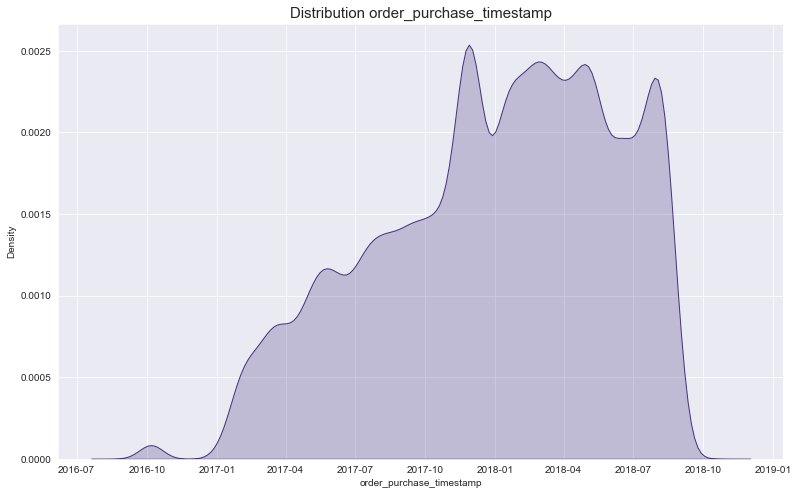

In [28]:
show_plot(df_orders, 'order_purchase_timestamp','kde')

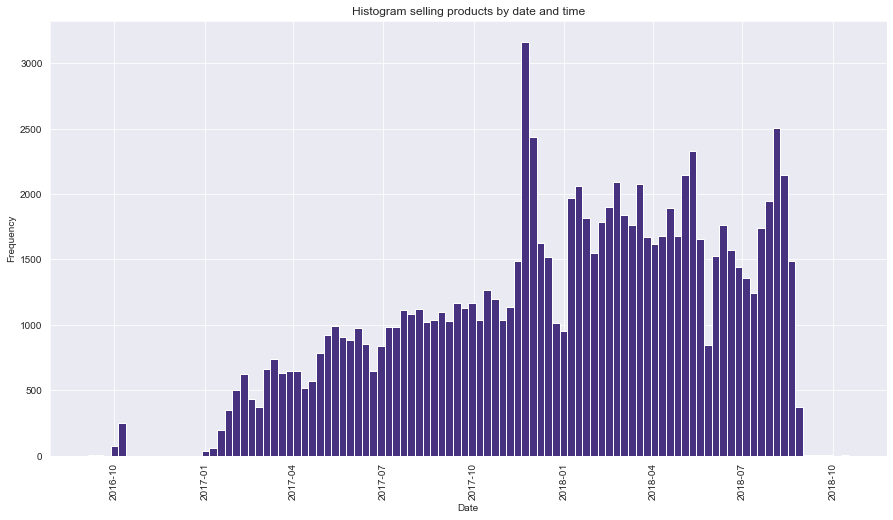

In [29]:
#visualizing 
plt.figure(figsize = (15, 8))
sns.set_style('darkgrid')
df_orders['order_purchase_timestamp'].hist(bins=100).set_title('Histogram selling products by date and time')
plt.ylabel("Frequency")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.show()

In [30]:
difference = df_orders.order_purchase_timestamp.max() - df_orders.order_purchase_timestamp.min()
print('Data presented from %s to %s,\n difference in %s.' % (df_orders.order_purchase_timestamp.min(), df_orders.order_purchase_timestamp.max(), difference))

Data presented from 2016-09-04 00:00:00 to 2018-10-17 00:00:00,
 difference in 773 days 00:00:00.


###  `Order Items`

In [31]:
df_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900,13.290
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.900,19.930
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.000,17.870


In [32]:
convert_to_dt(df_order_items, ['shipping_limit_date'])

In [33]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.900,13.290
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.900,19.930
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.000,17.870
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.990,12.790
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.900,18.140


In [34]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [35]:
# Order quantity distribution

display(df_order_items['order_item_id'].value_counts())
df_order_items['order_id'].nunique()

1     98666
2     9803 
3     2287 
4     965  
5     460  
6     256  
7     58   
8     36   
9     28   
10    25   
11    17   
12    13   
13    8    
14    7    
15    5    
16    3    
17    3    
18    3    
19    3    
20    3    
21    1    
Name: order_item_id, dtype: int64

98666

In [36]:
# Grouping by SKU and order ID:
df_order_items_qnt = df_order_items\
    .groupby(['product_id','order_id'], as_index=False)\
    .agg({
        'order_item_id': 'count', 
        'seller_id': 'first',
        'shipping_limit_date': 'first',
        'price': 'first',
        'freight_value': 'first'
        })

df_order_items_qnt.head(3)

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24,101.650,18.590
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18,129.900,13.930
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29,229.000,13.100


In [37]:
# Order quantity distribution
df_order_items_qnt.rename(columns = {'order_item_id': 'qnt'}, inplace = True)
df_order_items_qnt['qnt'].value_counts()

1     95337
2     5382 
3     953  
4     390  
6     172  
5     168  
10    5    
7     4    
12    2    
9     2    
15    2    
14    2    
8     2    
20    2    
11    1    
13    1    
Name: qnt, dtype: int64

### `Order Review`

In [38]:
df_order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [39]:
convert_to_dt(df_order_reviews, ['review_creation_date', 'review_answer_timestamp'])

In [40]:
# Instead of missing values, add "Untitled" and "No review"

df_order_reviews['review_comment_title'] = df_order_reviews['review_comment_title'].replace(np.nan, 'Untitled')
df_order_reviews['review_comment_message'] = df_order_reviews['review_comment_message'].replace(np.nan, 'No review')

In [41]:
df_order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Untitled,No review,2018-01-18,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Untitled,No review,2018-03-10,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Untitled,No review,2018-02-17,2018-02-18


## Creating Consolidated Orders table 

In [42]:
df_orders_consolidated = df_orders.merge(df_order_items_qnt, on = 'order_id')
df_orders_consolidated

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_time,delivery_time,shipping_time_delta,shipping_time,estimated_time,product_id,qnt,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,10:56:33,19:55:00,8 days,8 days,16 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.990,8.720
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,20:41:37,14:31:00,6 days,14 days,20 days,595fac2a385ac33a80bd5114aec74eb8,1,289cdb325fb7e7f891c38608bf9e0962,2018-07-30,118.700,22.760
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,08:38:49,13:50:00,18 days,9 days,27 days,aa4383b373c6aca5d8797843e5594415,1,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13,159.900,19.220
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,19:28:06,13:39:59,13 days,14 days,27 days,d0b61bfb1de832b15ba9d266ca96e5b0,1,66922902710d126a0e7d26b0e3805106,2017-11-23,45.000,27.200
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,21:18:39,19:46:34,10 days,3 days,13 days,65266b2da20d04dbe00c5c2d3bb7859e,1,2c9e548be18521d1c43cde1c582c6de8,2018-02-19,19.900,8.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-09,2017-03-10,2017-03-17,2017-03-28,09:54:05,11:18:03,11 days,8 days,19 days,ac35486adb7b02598c182c2ff2e05254,1,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15,72.000,13.080
102421,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06,2018-02-07,2018-02-28,2018-03-02,12:58:58,23:22:42,2 days,22 days,24 days,f1d4ce8c6dd66c47bbaa8c6781c2a923,1,1f9ab4708f3056ede07124aad39a2554,2018-02-12,174.900,20.100
102422,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27,2017-08-28,2017-09-21,2017-09-27,14:46:43,20:52:26,6 days,25 days,31 days,b80910977a37536adeddd63663f916ad,1,d50d79cb34e38265a8649c383dcffd48,2017-09-05,205.990,65.020
102423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08,2018-01-12,2018-01-25,2018-02-15,21:28:27,15:35:03,21 days,17 days,38 days,d1c427060a0f73f6b889a5c7c61f2ac4,2,a1043bafd471dff536d0c462352beb48,2018-01-12,179.990,40.590


In [43]:
df_orders_consolidated['revenue'] = df_orders_consolidated['qnt']*df_orders_consolidated['price']
#df_orders_consolidated['user_paid'] = df_orders_consolidated['price']+df_orders_consolidated['freight_value']
df_orders_consolidated.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_time,delivery_time,shipping_time_delta,shipping_time,estimated_time,product_id,qnt,seller_id,shipping_limit_date,price,freight_value,revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,10:56:33,19:55:00,8 days,8 days,16 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.990,8.720,29.990
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,20:41:37,14:31:00,6 days,14 days,20 days,595fac2a385ac33a80bd5114aec74eb8,1,289cdb325fb7e7f891c38608bf9e0962,2018-07-30,118.700,22.760,118.700
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,08:38:49,13:50:00,18 days,9 days,27 days,aa4383b373c6aca5d8797843e5594415,1,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13,159.900,19.220,159.900


In [44]:
df_orders_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 102424
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       102425 non-null  object         
 1   customer_id                    102425 non-null  object         
 2   order_status                   102425 non-null  object         
 3   order_purchase_timestamp       102425 non-null  datetime64[ns] 
 4   order_approved_at              102425 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   102425 non-null  datetime64[ns] 
 6   order_delivered_customer_date  102425 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  102425 non-null  datetime64[ns] 
 8   order_time                     102425 non-null  object         
 9   delivery_time                  102425 non-null  object         
 10  shipping_time_delta            102425 non-null  timedelt

In [45]:
df_orders_consolidated = df_orders_consolidated.merge(df_products, on = 'product_id')
df_orders_consolidated

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_time,delivery_time,shipping_time_delta,shipping_time,estimated_time,product_id,qnt,seller_id,shipping_limit_date,price,freight_value,revenue,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,10:56:33,19:55:00,8 days,8 days,16 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.990,8.720,29.990,utilidades_domesticas,40.000,268.000,4.000,500.000,19.000,8.000,13.000
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15,2017-08-15,2017-08-17,2017-08-18,2017-08-28,18:29:31,15:28:33,10 days,3 days,13 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21,29.990,7.780,29.990,utilidades_domesticas,40.000,268.000,4.000,500.000,19.000,8.000,13.000
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02,2017-08-02,2017-08-04,2017-08-07,2017-08-15,18:24:47,17:35:43,8 days,5 days,13 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08,29.990,7.780,29.990,utilidades_domesticas,40.000,268.000,4.000,500.000,19.000,8.000,13.000
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23,2017-10-25,2017-10-27,2017-11-07,2017-11-13,23:26:46,16:48:46,6 days,15 days,21 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31,29.990,14.100,29.990,utilidades_domesticas,40.000,268.000,4.000,500.000,19.000,8.000,13.000
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,20:41:37,14:31:00,6 days,14 days,20 days,595fac2a385ac33a80bd5114aec74eb8,1,289cdb325fb7e7f891c38608bf9e0962,2018-07-30,118.700,22.760,118.700,perfumaria,29.000,178.000,1.000,400.000,19.000,13.000,19.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,87b4c933f31145a28413b39d880ad6c3,ddfdf5e9b2659e1fbd073404c9b762e0,delivered,2018-03-02,2018-03-02,2018-03-06,2018-03-16,2018-03-21,17:12:05,21:23:32,5 days,14 days,19 days,cbaf5898b92064cd5e399c7cff291d0a,1,06a2c3af7b3aee5d69171b0e14f0ee87,2018-03-08,57.990,27.260,57.990,beleza_saude,50.000,"1,031.000",1.000,350.000,19.000,12.000,13.000
102421,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10,2017-08-10,2017-08-18,2017-08-23,2017-08-31,21:21:07,16:42:51,8 days,13 days,21 days,0df37da38a30a713453b03053d60d3f7,2,218d46b86c1881d022bce9c68a7d4b15,2017-08-17,356.000,18.120,712.000,esporte_lazer,53.000,"1,105.000",1.000,"2,800.000",28.000,23.000,23.000
102422,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20,2017-12-20,2017-12-20,2018-01-26,2018-01-18,09:52:41,20:25:25,-8 days,37 days,29 days,3d2c44374ee42b3003a470f3e937a2ea,1,ce248b21cb2adc36282ede306b7660e5,2017-12-27,55.900,15.140,55.900,instrumentos_musicais,34.000,372.000,2.000,300.000,16.000,6.000,12.000
102423,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-09,2017-03-10,2017-03-17,2017-03-28,09:54:05,11:18:03,11 days,8 days,19 days,ac35486adb7b02598c182c2ff2e05254,1,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15,72.000,13.080,72.000,beleza_saude,50.000,"1,517.000",1.000,"1,175.000",22.000,13.000,18.000


In [46]:
df_orders_by_days = (df_orders_consolidated.groupby(['order_purchase_timestamp'])
                     .agg({'order_id':'count', 'qnt':'sum', 'freight_value':'sum', 'shipping_time':'mean', 'estimated_time':'mean', 'revenue':'sum'})
                     .rename(columns={'orders_id':'order_count', 'qnt':'items_count'})
                     .sort_values(by='revenue', ascending=False)
                     .reset_index())
df_orders_by_days

,order_purchase_timestamp,order_id,items_count,freight_value,shipping_time,estimated_time,revenue
0,2017-11-24,1231,1366,"23,465.160",17 days 07:04:37.822908204,23 days 16:36:39.187652315,"152,653.740"
1,2017-11-25,519,580,"9,793.030",20 days 01:26:00.693641618,24 days 15:21:09.364161849,"60,923.480"
2,2018-08-06,396,430,"8,570.350",2 days 15:01:49.090909090,14 days 04:47:16.363636363,"56,427.390"
3,2018-05-16,370,406,"7,774.940",10 days 04:36:19.459459459,20 days 13:06:09.729729729,"56,283.730"
4,2018-05-07,378,421,"7,519.420",5 days 18:59:02.857142857,20 days 06:20:57.142857142,"54,167.480"
...,...,...,...,...,...,...,...
611,2016-09-15,1,3,2.830,55 days 00:00:00,19 days 00:00:00,134.970
612,2016-10-02,1,1,9.340,578 days 00:00:00,23 days 00:00:00,100.000
613,2016-09-04,2,2,63.340,653 days 00:00:00,46 days 00:00:00,72.890
614,2016-09-05,1,1,15.560,589 days 00:00:00,53 days 00:00:00,59.500


If you look at the pivot table by date. it can be noted that the most profitable days were November 24 and 25. It looks like it was Black Friday, the biggest sale of the year.

In [47]:
df_orders_consolidated.stb.freq(['order_status'])

,order_status,count,percent,cumulative_count,cumulative_percent
0,delivered,100196,97.824,100196,97.824
1,shipped,1127,1.100,101323,98.924
2,canceled,465,0.454,101788,99.378
3,invoiced,322,0.314,102110,99.692
4,processing,306,0.299,102416,99.991
5,unavailable,7,0.007,102423,99.998
6,approved,2,0.002,102425,100.000


A good indicator - almost 98% of orders are marked as delivered.

In [48]:
df_orders_consolidated.stb.freq(['product_category_name'])

,product_category_name,count,percent,cumulative_count,cumulative_percent
0,cama_mesa_banho,10160,10.063,10160,10.063
1,beleza_saude,9022,8.936,19182,18.999
2,esporte_lazer,7858,7.783,27040,26.782
3,informatica_acessorios,6887,6.821,33927,33.603
4,moveis_decoracao,6781,6.716,40708,40.319
...,...,...,...,...,...
68,la_cuisine,13,0.013,100935,99.970
69,cds_dvds_musicais,12,0.012,100947,99.982
70,pc_gamer,8,0.008,100955,99.990
71,fashion_roupa_infanto_juvenil,8,0.008,100963,99.998


## Tableau visualization

In [49]:
df_orders_consolidated.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_time,delivery_time,shipping_time_delta,shipping_time,estimated_time,product_id,qnt,seller_id,shipping_limit_date,price,freight_value,revenue,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,10:56:33,19:55:00,8 days,8 days,16 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.990,8.720,29.990,utilidades_domesticas,40.000,268.000,4.000,500.000,19.000,8.000,13.000
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15,2017-08-15,2017-08-17,2017-08-18,2017-08-28,18:29:31,15:28:33,10 days,3 days,13 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21,29.990,7.780,29.990,utilidades_domesticas,40.000,268.000,4.000,500.000,19.000,8.000,13.000
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02,2017-08-02,2017-08-04,2017-08-07,2017-08-15,18:24:47,17:35:43,8 days,5 days,13 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08,29.990,7.780,29.990,utilidades_domesticas,40.000,268.000,4.000,500.000,19.000,8.000,13.000


In [50]:
df_orders_consolidated = df_orders_consolidated.merge(df_customers, on = 'customer_id')
df_orders_consolidated=df_orders_consolidated.drop(['order_approved_at', 'shipping_limit_date', 
                             'product_name_lenght', 'product_description_lenght',
                            'product_weight_g', 'product_length_cm', 'product_height_cm',
                            'product_width_cm', 'customer_unique_id'], axis=1)

df_orders_consolidated.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_time,delivery_time,shipping_time_delta,shipping_time,estimated_time,product_id,qnt,seller_id,price,freight_value,revenue,product_category_name,product_photos_qty,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-04,2017-10-10,2017-10-18,10:56:33,19:55:00,8 days,8 days,16 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,29.990,8.720,29.990,utilidades_domesticas,4.000,3149,sao paulo,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15,2017-08-17,2017-08-18,2017-08-28,18:29:31,15:28:33,10 days,3 days,13 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,29.990,7.780,29.990,utilidades_domesticas,4.000,3366,sao paulo,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02,2017-08-04,2017-08-07,2017-08-15,18:24:47,17:35:43,8 days,5 days,13 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,29.990,7.780,29.990,utilidades_domesticas,4.000,2290,sao paulo,SP


In [51]:
df_orders_consolidated.to_csv("olist_to_tableau.csv", index=False)


**----------------------------------------------------------------------------------------------------------------------------------**

**For this project, a visualization was made in Tableau, we can explore the data, patterns, using this link.**

https://public.tableau.com/app/profile/lana.dashevsky/viz/Olist_16904135576680/Olist




**----------------------------------------------------------------------------------------------------------------------------------**

In [52]:
#dfSummary(df_orders_consolidated)

## Main Conclusions

So, we were provided with 8 datasets that contained information about the work of the Brazilian Olist online store.
These datasets provide information about orders, customers, sellers, products, reviews, and geolocation. Datasets are interconnected using various keys and can be collected into a large common database.

- The dataset contains more than 100K rows.
- The information provided covers the period from 2016-09-04 to 2018-10-17, or 773 days.
- The revenue received by the store for this period is 13.6M, sold 32.9K items.
- Number of unique buyers - 95.4K, number of unique sellers - 3K

- It should be noted that 2017 was a very successful year for the store - revenue was increased almost 10 times from 120K in January to 1M in November 2017.
- In 2018, the store kept the trend and the revenue fluctuated around 850-980K.

- Monday is the best day in terms of store revenue.

- Among all the states in terms of the number of orders and share in revenue, Sao Paulo occupies a wide margin from the rest. Also there are most of all buyers - 15.4K.

- The most successful day for the entire period is Black Friday, which was on November 24, 2017 - 152.6K revenue, 1231 goods sold.

In conclusion, our data analysis has provided us with valuable information about our online store and will allow us to make informed decisions based on data.

## Tableau Vizualization

The dashboard that we have built into Tableau provides a dynamic and interactive way to explore the online store data. It is designed to be easily accessible and user-friendly, so that managers, employees, and other stakeholders can quickly and easily access the information they need.

https://public.tableau.com/app/profile/lana.dashevsky/viz/Olist_16904135576680/Olist

With this dashboard, users can quickly visualize key trends and patterns in the data, such as sales over time.

## What else is interesting to see:

Due to time limits, I made the first preliminary study of the data.
What else is interesting to see:
- Analysis of customer behavior - segmentation can be done based on the RFM model. Study frequency, average bill, time between purchases. Based on this, further create a marketing strategy to work with different customer segments and increase profits and sales.
- Feedback from customers. Relationship between product features like price, category, and customer reviews.
- Explore product categories with high and low ratings. Analyze their share in the total profit of the store.
- Analyze sellers - quantity of goods, price, delivery time, customer satisfaction ratings.
- Geography and delivery. Buyers buy in their city or vice versa order goods from other states.
- Does the number of photos, product description affect the purchase and reviews.
- Is there a correlation between products that have reviews and their sales.
- Does the cost of shipping affect the sales of goods.
- Track whether the price of goods has changed and how it affected sales.

And many more other questions that can be studied based on this dataset.